# Home Assignment-1 (Part 2 - practice with data)

### **Nothing fancy - just making friends with 🐍 and 🐼**



Enjoy✨










In [ ]:
print('Hi')

🧚 Loading data

In [6]:
import pandas as pd

apps_ = pd.read_csv('https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/02-classes/googleplaystore.csv')
reviews_ = pd.read_csv('https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/02-classes/googleplaystore_user_reviews.csv')

🧚 Now, before diving into data, let's do small cleaning and change fromat of "Size" variable

Please, just run the code below, to chang the type.

🔗[Documentation: apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)



In [7]:
# Just run the code below
# Define the funtion that changes representation of the variable
# No coding in needed, yes, and it's not a joke :)
def to_number(x):
    mult = 1
    if x[-1] == "M":
      mult = 10**6
    if x[-1] == "k":
      mult = 10**3
    x_new = x[:-1].replace(",", ".")

    return mult*float(x_new)

# Use our custom fucntion to change the variable types
apps.Size[apps.Size!='Varies with device'] = apps.Size[apps.Size!='Varies with device'].apply(to_number)

NameError: ignored

# Exercises

# Data analysis

In [8]:
apps = apps_.copy()
reviews = reviews_.copy()

## 1.1 What is the mean price of apps with type Paid? (1 point)

In [ ]:
apps.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [ ]:
apps.Price.replace('Everyone',0,inplace = True)

In [ ]:
apps.Price[apps.Price!="0"] = apps.Price[apps.Price!="0"].str[1:]

In [ ]:
apps.Price = apps.Price.apply(float)

In [ ]:
apps.groupby(apps["Type"]).agg("mean")

<ipython-input-9-15126f043b26>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  apps.groupby(apps["Type"]).agg("mean")


,Rating,Price
Type,,
0,19.000000,NaN
Free,4.186203,0.000000
Paid,4.266615,13.920837


##1.2 Plot the countplot for column Content Rating for apps dataset. (1 point)

NameError: ignored

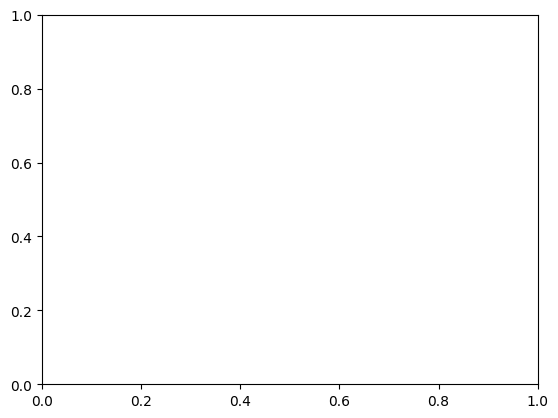

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.countplot(y='Content Rating',data= apps)
ax.set_title("Countplot")
ax.set_ylabel("Content rating");
ax.set_xlabel("Count");

##1.3 Calculate the mean size of the app for those apps that do not their size 'Varies with device' for each category. (1 point)


In [ ]:
meansize = apps[apps["Size"]!="Varies with device"]
meansize.Size = apps.Size.str[:-1]
meansize.Size.replace('1,000',1,inplace = True)
meansize.Size = meansize.Size.apply(float)

In [ ]:
meansize.groupby("Category")["Size"].mean()

Category
1.9                      1.000000
ART_AND_DESIGN          12.370968
AUTO_AND_VEHICLES       34.502667
BEAUTY                  13.795745
BOOKS_AND_REFERENCE     40.349746
BUSINESS                26.622500
COMICS                  34.111765
COMMUNICATION           55.786792
DATING                  16.710377
EDUCATION               30.528829
ENTERTAINMENT           21.853333
EVENTS                  19.817544
FAMILY                  38.007697
FINANCE                 28.894788
FOOD_AND_DRINK          22.185000
GAME                    45.797241
HEALTH_AND_FITNESS      38.178030
HOUSE_AND_HOME          25.616176
LIBRARIES_AND_DEMO     180.834146
LIFESTYLE               31.265507
MAPS_AND_NAVIGATION     31.312963
MEDICAL                 44.495853
NEWS_AND_MAGAZINES      14.448148
PARENTING               22.512963
PERSONALIZATION         42.655493
PHOTOGRAPHY             21.249606
PRODUCTIVITY            35.628713
SHOPPING                31.886070
SOCIAL                  26.211429
SPORT

##1.4 Plot histogram of rating of apps (1 point)

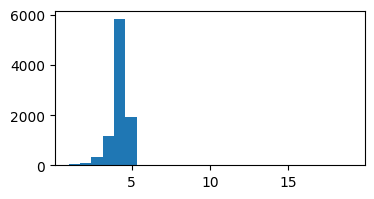

In [ ]:
plt.figure(figsize=(4,2))
plt.hist(apps["Rating"],bins=25)
plt.show()

##1.5 Print top 5 most negative reviews (1 point)


In [ ]:
apps.Reviews[apps.Reviews.str.isnumeric()==False]
apps.Reviews[apps.Reviews.str.isnumeric()==False] = int(float(apps.Reviews[apps.Reviews.str.isnumeric()==False].str[:-1])*10**6)

apps.Reviews = apps.Reviews.apply(int)

In [ ]:
apps.groupby("Category").Reviews.mean().sort_values(ascending=False).head(5)

Category
1.9              3.000000e+06
COMMUNICATION    2.107138e+06
SOCIAL           2.105903e+06
GAME             1.385859e+06
PHOTOGRAPHY      6.373631e+05
Name: Reviews, dtype: float64

##1.6 Print app with largest number of reviews. (1 point)


In [ ]:
apps[["App","Reviews"]].sort_values(by="Reviews",ascending=False)

##1.7 Print percentage of positive reviews for each category (1 point)

In [ ]:
merged_table = reviews.merge(apps,on="App",how="inner")

In [ ]:
merged_table.groupby(["Category"])["Sentiment"].value_counts(normalize=True)

In [ ]:
merged_table[merged_table["Sentiment"]=="Positive"].groupby("Category")["Sentiment"].count() / merged_table.groupby("Category")["Sentiment"].count()*100

##1.8 Print category of apps with lowest sentiment subjectivity (1 point)

In [ ]:
merged_table

In [ ]:
import numpy as np
merged_table = merged_table[merged_table["Sentiment_Subjectivity"]!=np.NaN]
merged_table[["Category","Sentiment_Subjectivity"]].groupby("Category").min()

#Plotting

## 1.9 Plot distribution of prices for Teen content Rating (1 point)

🧚 Do not forget to make title, add axes ticks and axes labels!

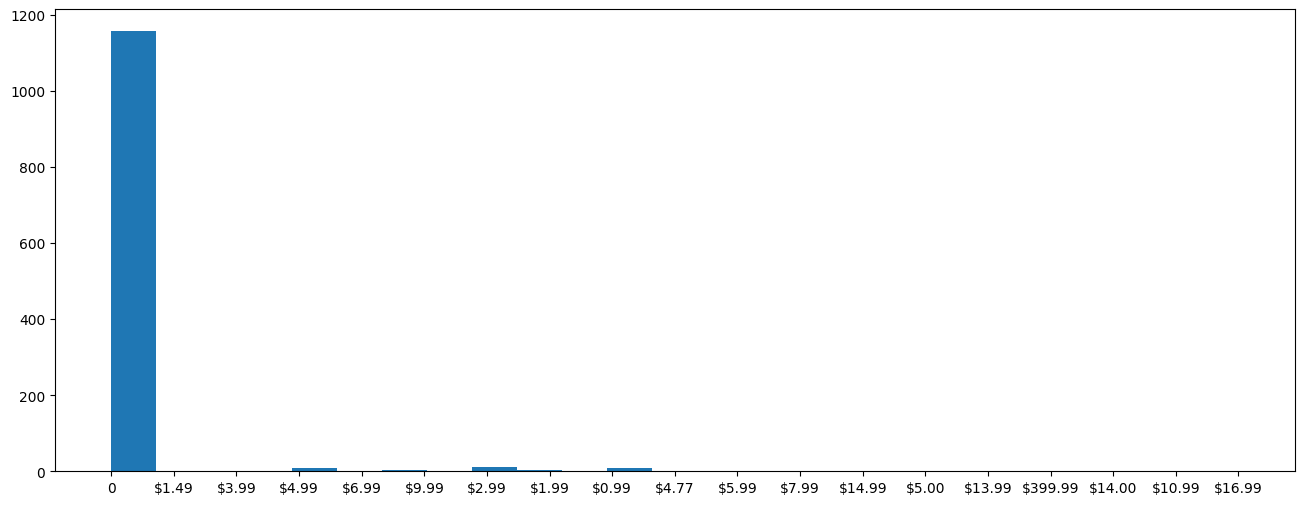

In [9]:
teenContent = apps[apps["Content Rating"] == "Teen"]
plt.figure(figsize=(16,6))
plt.hist(teenContent['Price'],bins=25)

plt.show()

##1.10 Plot boxplot of rating for Paid and Free on same graph but different axes (1 point)

In [ ]:
dataPaid = apps[apps["Type"]=="Paid"]
dataFree = apps[apps["Type"]=="Free"]

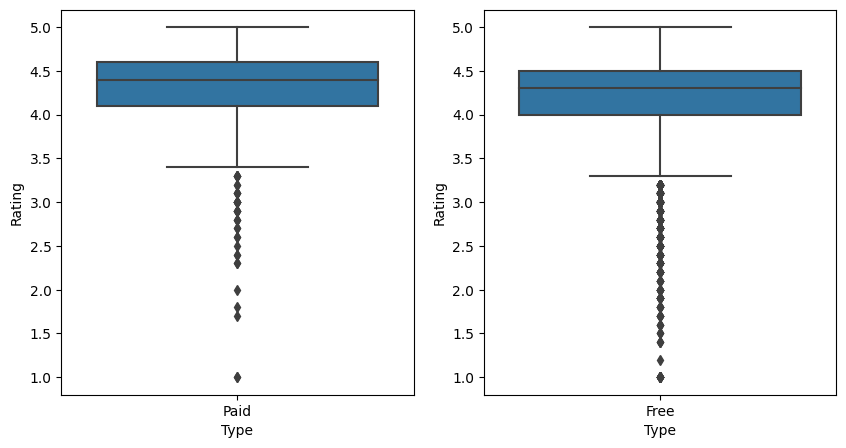

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (10,5))
sns.boxplot(ax=axes[0],data=dataPaid,x="Type",y="Rating")
sns.boxplot(ax=axes[1],data=dataFree,x="Type",y="Rating")
fig.show()